# Hypothesis Testing with Insurance Data (Core)
- Martisha Owens
- 12/1/2022


- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?


- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [75]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Do smokers have higher insurance charges than non-smokers?
- Null Hypothesis: The same insurance charges apply regardless of whether they smoke or not.
- Alternative Hypothesis: Smoking habits does have an affect insurance charges, and smokers are charged more.
- Numerical test with 2 samples (smokers and non-smokers), T-test

In [20]:
smoker_charge = df.loc[df['smoker']=='yes','charges']
nonsmoker_charge = df.loc[df['smoker']=='no','charges']

## Supporting Visualization

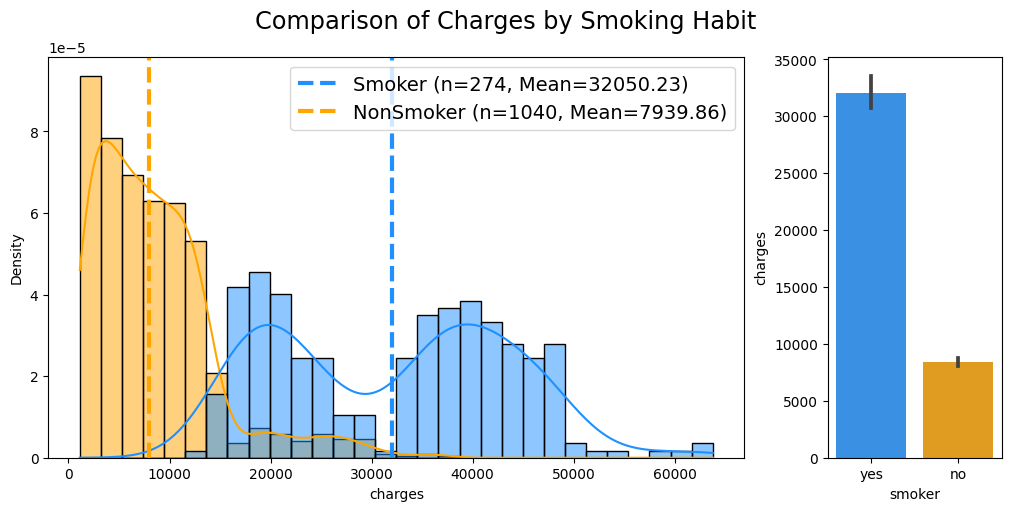

In [76]:
smoker_palette={'yes':'dodgerblue', 'no':'orange'}

## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df[['smoker','charges']], x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)
 
ax.axvline(np.mean(smoker_charge), ls='--',lw=3, 
           label=f"Smoker (n={len(smoker_charge)}, Mean={np.mean(smoker_charge):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(nonsmoker_charge), ls='--', lw=3, 
           label=f"NonSmoker (n={len(nonsmoker_charge)}, Mean={np.mean(nonsmoker_charge):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])

## Barplot
sns.barplot(data=df[['smoker','charges']], x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges by Smoking Habit',fontsize='xx-large');

## Test for Outliers

In [10]:
zscores_s = stats.zscore(smoker_charge)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)
#No outliers for the smoker group

0

In [21]:
zscores_ns = stats.zscore(nonsmoker_charge)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)
#There are 24 outliers in the Non-Smokers group

24

In [29]:
nonsmoker_charge = nonsmoker_charge[(np.abs(stats.zscore(nonsmoker_charge)) < 3)]

## Test for Normality

In [32]:
stats.normaltest(smoker_charge)
#Smoker group is not normal, but the sample size is greater than 15, so will proceed

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [33]:
stats.normaltest(nonsmoker_charge)
#Non-Smoker group is also not normal, but the sample size is greater than 15, so will proceed

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

## Test for Equal Variance

In [34]:
stats.levene(smoker_charge,nonsmoker_charge)
#Failed the assumption of equal variance, need to include equal_var=False

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

## Perform T-Test

In [36]:
result = stats.ttest_ind(smoker_charge,nonsmoker_charge,equal_var = False)
result.pvalue < .05
#Fail to reject Null, Accept Alt

True

- In conclusion, we failed to reject the Null Hypothesis and accepted the Alt. Hypothesis.
- Smoking habits do affect insurance charges, and smokers are charged more.

# Are men more likely to smoke than women?
- Null Hypothesis: Both genders smoke equally.
- Alternative Hypothesis: Men are more likely to smoke than women.
- Categorical test (men vs. women)(smoker vs.non-smoker), Chi-Squared.

In [77]:
#Replacing Smoker into a categorical output. [Smoker:1, NonSmoker:0]
df['smoker_cat'] = df['smoker']
df['smoker_cat'].replace(['yes','no'],[1,0],inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_cat
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


## Supporting Visualization

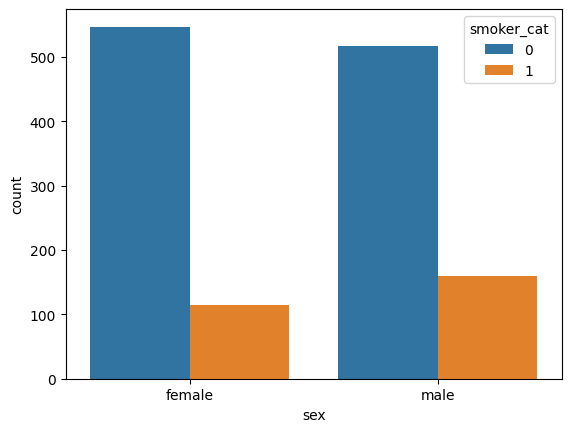

In [79]:
ax = sns.countplot(data=df[['sex','smoker_cat']], x='sex',hue='smoker_cat')

## Perform Chi-squared Test

In [80]:
table = pd.crosstab(df['sex'], df['smoker_cat'])
table

smoker_cat,0,1
sex,,
female,547,115
male,517,159


In [67]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result
print(f'p-value {p.round(4)}, Fail to reject Null: {p<.05}')

p-value 0.0065, Fail to reject Null: True


- In conclusion, we failed to reject the Null Hypothesis and accepted the Alt. Hypothesis.
- Men are more likely to smoke than women.

# Do different regions have different charges, on average?
- Null Hypothesis: Every region has the same out of insurance charges.
- Alternative Hypothesis: Different regions have different charges.
- Numerical with more than two groups, ANOVA test

In [88]:
#Create Groups
groups = {}

for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [89]:
pd.DataFrame(groups)

,southwest,southeast,northwest,northeast
0,16884.924,NaN,NaN,NaN
1,NaN,1725.5523,NaN,NaN
2,NaN,4449.4620,NaN,NaN
3,NaN,NaN,21984.47061,NaN
4,NaN,NaN,3866.85520,NaN
...,...,...,...,...
1333,NaN,NaN,10600.54830,NaN
1334,NaN,NaN,NaN,2205.9808
1335,NaN,1629.8335,NaN,NaN
1336,2007.945,NaN,NaN,NaN


## Supporting Visualization

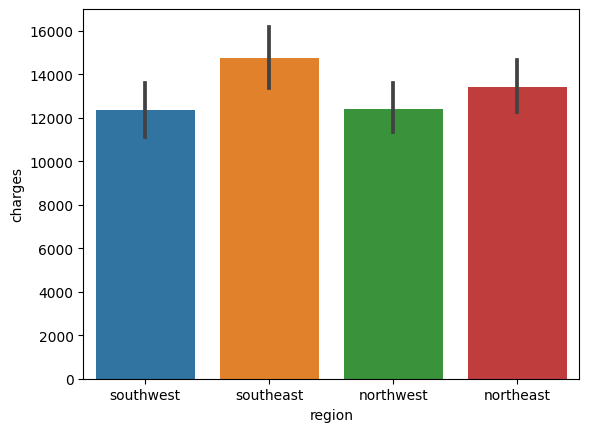

In [87]:
sns.barplot(data=df, x='region',y='charges');

## Test for Outliers

In [101]:
outlier_results = {}
for i, data in groups.items():
    zscores = stats.zscore(groups[i])
    outliers = abs(zscores)>3
    outlier_results[i] = {np.sum(outliers)}
    
## convert to a dataframe
outlier_results
#All of the groups have outliers

{'southwest': {8}, 'southeast': {2}, 'northwest': {7}, 'northeast': {4}}

In [106]:
for i,data in groups.items():
    groups[i] = groups[i][(np.abs(stats.zscore(groups[i])) < 3)]

## Test for Normality

In [108]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [109]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df
#Each group does not have a normal distribution but the sample size is big enough

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


## Test for Equal Variance

In [113]:
stats.levene( *groups.values())
#Failed the assumption of equal variance, need to include equal_var=False

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

## Perform ANOVA Testing

In [117]:
result = stats.f_oneway( *groups.values())
result
#Failed to reject the Null Hypothesis and accepted the Alt. Hypothesis.

F_onewayResult(statistic=5.496394682506454, pvalue=0.0009419710075537749)

In [118]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = df['charges']
labels = df['region']

In [119]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- In conclusion, we failed to reject the Null Hypothesis and accepted the Alt. Hypothesis.
- The region where the difference in charges were significant was between the southeast and southwest region. 